<a href="https://colab.research.google.com/github/lhlanh/lhlanh/blob/main/HW%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0000e+00 - loss: 2.8870
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2722 - loss: 3.4353
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 4.2529
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 3.8518
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4111 - loss: 2.4747
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4111 - loss: 1.3390
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6611 - loss: 0.7633
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 3.3178
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9333 - loss: 0.7521
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5861 - loss: 1.0964
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7528 - loss: 0.6247
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accur

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


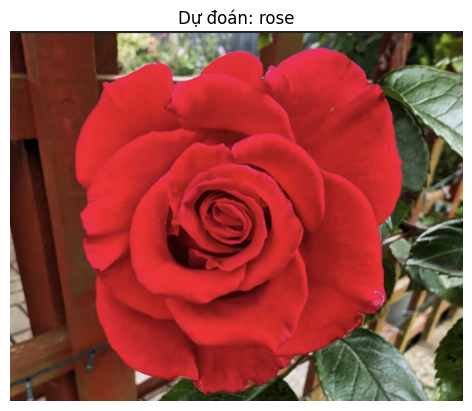

'rose'

In [8]:
#Nhan dien hoa
from PIL import Image
import numpy as np
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Danh sách ảnh và nhãn tương ứng
image_paths = [
    "/content/rose.jpg",
    "/content/hibiscus.jpg",
    "/content/sunflower.jpg",
    "/content/daisy.jpg",
    "/content/sakura.jpg"
]
labels = [2, 4, 3, 0, 1]
flower_names = ["daisy", "sakura", "rose", "sunflower", "hibiscus"]

# Load và xử lý ảnh
X = []
for path in image_paths:
    img = Image.open(path).resize((32, 32)).convert('RGB')
    X.append(np.array(img))
X = np.array(X).astype('float32') / 255.0
X = X.reshape((X.shape[0], 32 * 32 * 3))  # Flatten ảnh

# One-hot encode nhãn
Y = to_categorical(labels, num_classes=5)

# Mô hình ANN tương đương
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X, Y, epochs=100, batch_size=1)
model.save("flower_model_ann_equivalent.h5")

# Hàm dự đoán
def predict_flower(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x_input = np.array(img).astype('float32') / 255.0
    x_input = x_input.reshape(1, 32*32*3)

    prediction = model.predict(x_input)
    predicted_label = np.argmax(prediction)
    predicted_flower = flower_names[predicted_label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {predicted_flower}")
    plt.axis('off')
    plt.show()

    return predicted_flower

# 👉 Test
predict_flower("/content/rose_test.jpg")

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_236 (Dense)               │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_237 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_238 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_239 (Dense)               │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.2946 - loss: 1.9628
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1369 - loss: 2.0187 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3681 - loss: 1.4071 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3472 - loss: 1.8737
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4206 - loss: 1.4319
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4206 - loss: 1.5269
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2738 - loss: 2.1468
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2946 - loss: 1.8257
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3264 - loss: 1.7332 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4633 - loss: 1.6520
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5367 - loss: 1.5593
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3056 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


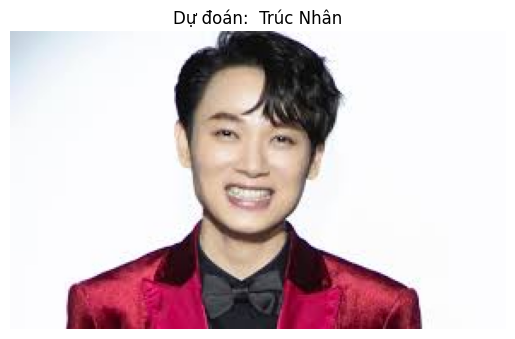

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


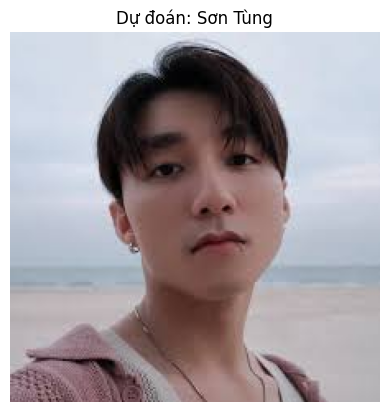

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


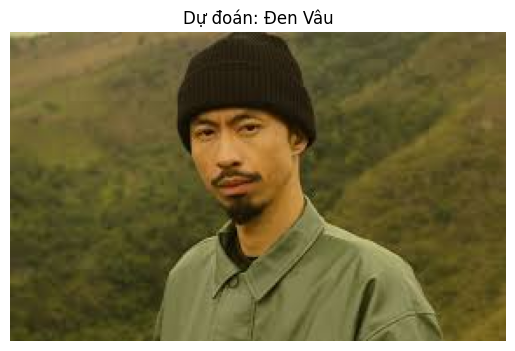

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


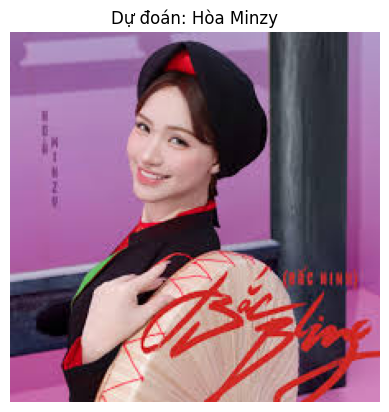

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


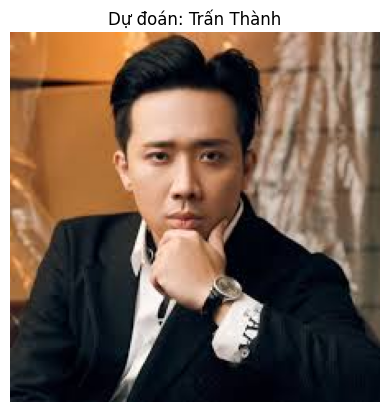

In [ ]:
#Nhan dien khuon mat
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

label_map = {
    "truc_nhan": 0,
    "son_tung": 1,
    "tran_thanh": 2,
    "hoa_minzy": 3,
    "den_vau": 4
}
face_names = [" Trúc Nhân", "Sơn Tùng", "Trấn Thành", "Hòa Minzy", "Đen Vâu"]


data_dir = "/content/faces"
X = []
Y = []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.isdir(folder_path) or folder_name not in label_map:
        continue
    label = label_map[folder_name]

    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(img_path).resize((32, 32)).convert('RGB')
            x = np.array(img).astype('float32') / 255.0
            X.append(x)
            Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")

X = np.array(X)
Y = np.array(Y)


X_flat = X.reshape((X.shape[0], 32 * 32 * 3))
Y_oh = to_categorical(Y, num_classes=5)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_flat, Y_oh, epochs=100, batch_size=16)

model.save("face_recognition_ann_model.h5")

def predict_face(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    person = face_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {person}")
    plt.axis('off')
    plt.show()



# Ví dụ:
predict_face("/content/hinh test/truc nhan test.jpg")
predict_face("/content/hinh test/song tung test2.jpg")
predict_face("/content/hinh test/den vau test6.jpg")
predict_face("/content/hinh test/hoa minzy_test1.jpg")
predict_face("/content/hinh test/tran thanh test2.jpg")

Bỏ qua ảnh lỗi: /content/vietnamese_money/50k/50k.avif


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_276 (Dense)               │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_277 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_278 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_279 (Dense)               │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2143 - loss: 1.7015
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 1.9554
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2857 - loss: 2.3680
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.2143 - loss: 2.4183
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.4286 - loss: 2.1184
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.2857 - loss: 1.6186
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.3571 - loss: 2.4093
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.1429 - loss: 2.3233
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.1429 - loss: 2.2669
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.3571 - loss: 1.7813
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3571 - loss: 2.6470
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.28

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


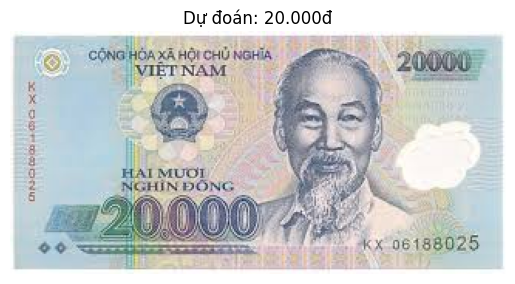

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


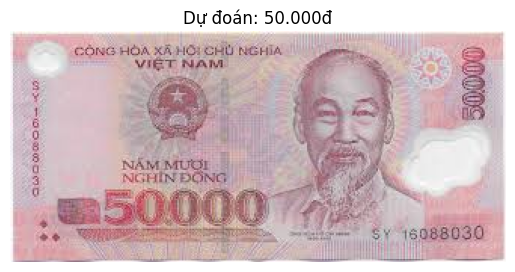

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


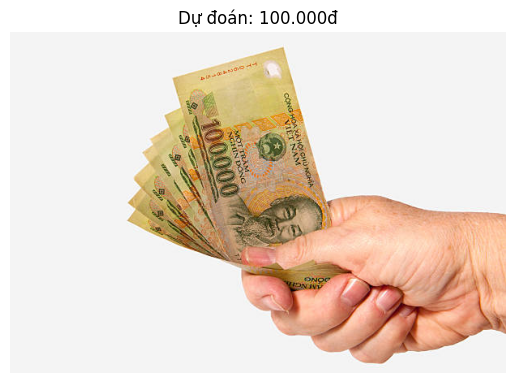

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


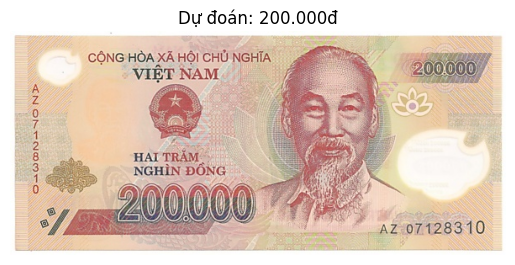

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


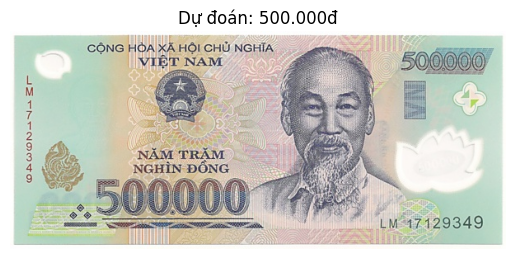

In [ ]:
#Nhan dien tien
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from PIL import Image
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


label_map = {

    "20k": 0,
    "50k": 1,
    "100k": 2,
    "200k": 3,
    "500k": 4
}
money_names = [ "20.000đ", "50.000đ", "100.000đ", "200.000đ", "500.000đ"]


data_dir = "/content/vietnamese_money"
X, Y = [], []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.isdir(folder_path) or folder_name not in label_map:
        continue
    label = label_map[folder_name]

    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(img_path).resize((32, 32)).convert('RGB')
            x = np.array(img).astype('float32') / 255.0
            X.append(x)
            Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")


X = np.array(X)
Y = np.array(Y)
X_flat = X.reshape((X.shape[0], 32 * 32 * 3))
Y_oh = to_categorical(Y, num_classes=5)


X_flat, Y_oh = shuffle(X_flat, Y_oh, random_state=42)


model = Sequential([
    Dense(512, activation='relu', input_shape=(32*32*3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_flat, Y_oh, epochs=500, batch_size=16)


model.save("money_recognition_ann_model.h5")


def predict_money(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    money = money_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {money}")
    plt.axis('off')
    plt.show()



# Dự đoán thử

predict_money("/content/hinh test/20k_test3.jpg")
predict_money("/content/hinh test/50k_test2.jpg")
predict_money("/content/hinh test/100k_test2.jpg")
predict_money( "/content/hinh test/200k_test1.jpg")
predict_money("/content/hinh test/500k_test.jpg")


Bỏ qua ảnh lỗi: /content/palm_data/palm/.ipynb_checkpoints
Bỏ qua ảnh lỗi: /content/palm_data/palm/palm


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_260 (Dense)               │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_261 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_262 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_263 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,737,858 (6.63 MB)

 Trainable params: 1,737,858 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7273 - loss: 0.5722
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5455 - loss: 4.0984
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4545 - loss: 2.0693
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7273 - loss: 0.5174
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6364 - loss: 0.4873
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6364 - loss: 0.5424
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8182 - loss: 0.5394
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6364 - loss: 0.9184
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8182 - loss: 0.6824
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.7682
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5455 - loss: 0.7502
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7273 - los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


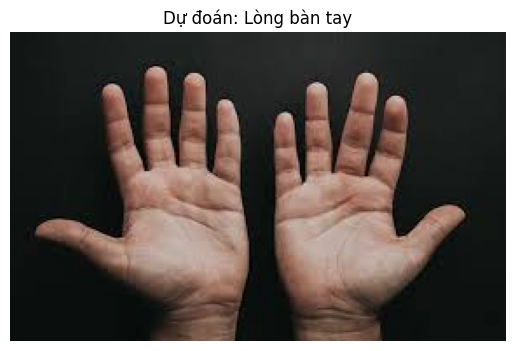

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


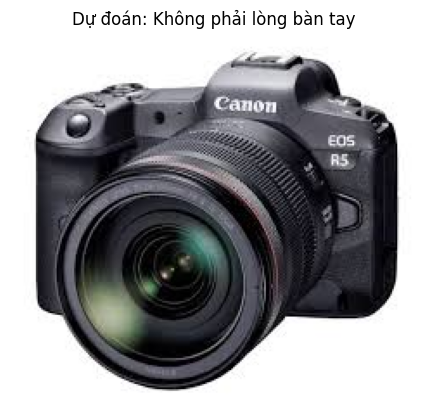

'Không phải lòng bàn tay'

In [ ]:
#Nhan dien long ban tay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt


label_map = {
    "palm": 0,
    "not_palm": 1
}
class_names = ["Lòng bàn tay", "Không phải lòng bàn tay"]


data_dir = "/content/palm_data"
X = []
Y = []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.isdir(folder_path) or folder_name not in label_map:
        continue
    label = label_map[folder_name]

    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(img_path).resize((32, 32)).convert('RGB')
            x = np.array(img).astype('float32') / 255.0
            X.append(x)
            Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")


X = np.array(X)
Y = np.array(Y)
X_flat = X.reshape((X.shape[0], 32 * 32 * 3))
Y_oh = to_categorical(Y, num_classes=2)


model = Sequential([
    Dense(512, activation='relu', input_shape=(32*32*3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_flat, Y_oh, epochs=100, batch_size=16)


model.save("palm_recognition_ann_model.h5")

def predict_palm(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    result = class_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {result}")
    plt.axis('off')
    plt.show()



# Ví dụ
predict_palm("/content/hinh test/test1.jpg")
predict_palm("/content/hinh test/test2.jpg")


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_272 (Dense)               │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_273 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_274 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_275 (Dense)               │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0526 - loss: 2.0066
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2103 - loss: 2.2242
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5050 - loss: 1.3031
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4107 - loss: 1.6952
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4633 - loss: 1.5521
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2421 - loss: 2.1727
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3998 - loss: 1.8498
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3998 - loss: 1.7069
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6419 - loss: 1.0667
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6210 - loss: 0.9836
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5685 - loss: 1.0538
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3790 - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


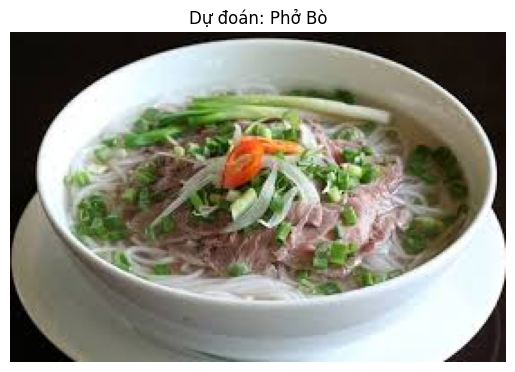

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


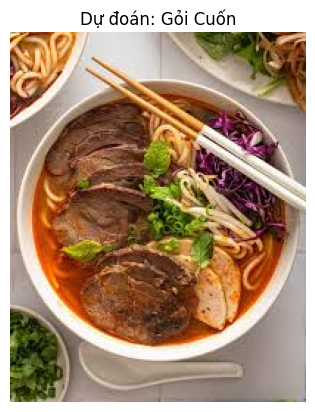

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


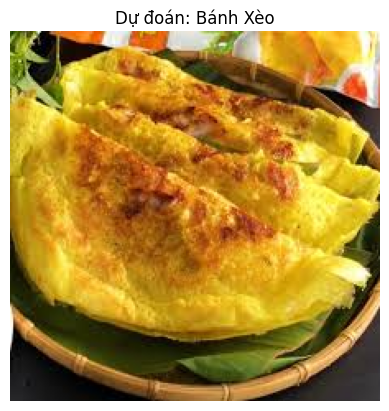

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


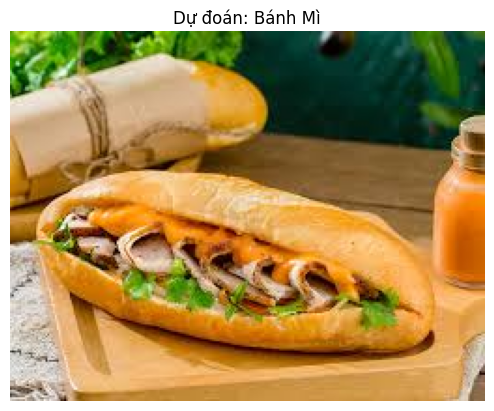

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


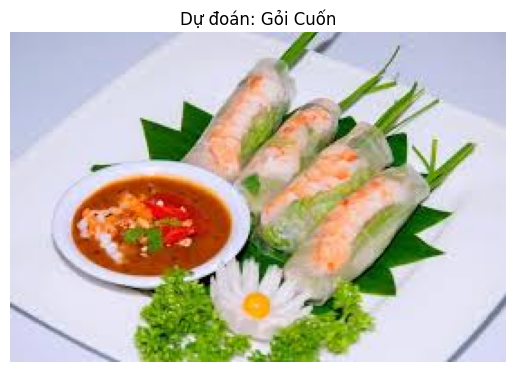

In [ ]:
#Nhan dien mon an
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt


label_map = {
    "banh_mi": 0,
    "banh_xeo": 1,
    "bun_bo": 2,
    "goi_cuon": 3,
    "pho_bo": 4
}
food_names = ["Bánh Mì", "Bánh Xèo", "Bún Bò", "Gỏi Cuốn", "Phở Bò"]


data_dir = "/content/mon an"
X = []
Y = []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.isdir(folder_path) or folder_name not in label_map:
        continue
    label = label_map[folder_name]

    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(img_path).resize((32, 32)).convert('RGB')
            x = np.array(img).astype('float32') / 255.0
            X.append(x)
            Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")


X = np.array(X)
Y = np.array(Y)

X_flat = X.reshape((X.shape[0], 32 * 32 * 3))
Y_oh = to_categorical(Y, num_classes=5)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_flat, Y_oh, epochs=100, batch_size=16)


model.save("mon_an_recognition_ann_model.h5")

def predict_food(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    food = food_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {food}")
    plt.axis('off')
    plt.show()



# Ví dụ:
predict_food("/content/hinh test/pho bo test1.jpg")
predict_food("/content/hinh test/bun bo test1.jpg")
predict_food("/content/hinh test/banh xeo test2.jpg")
predict_food("/content/hinh test/banh mi_test.jpg")
predict_food("/content/hinh test/goi cuon 1jpg.jpg")